In [16]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [23]:
def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K]
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    pad_height = (im.shape[0] - kernel.shape[0]) // 2
    pad_width = (im.shape[1] - kernel.shape[1]) // 2
    padded_kernel = np.pad(kernel, ((pad_height+1, pad_height), (pad_width+1, pad_width)), mode='constant')
    padded_kernel = np.fft.ifftshift(padded_kernel)

    fft_kernel = np.fft.fft2(padded_kernel)

    im_fft = np.fft.fft2(im) # Converting image to frequency domain
    result_fft = im_fft * fft_kernel # Convolving
    conv_result = np.fft.ifft2(result_fft).real # Reversing the fourier transform

    #This was taken from ../tutorials/frequency_domain.ipynb
    def magnitude(fft_im):
        real = fft_im.real
        imag = fft_im.imag
        return np.sqrt(real**2 + imag**2)

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))

        # Visualize image
        plt.subplot(1, 5, 1)
        plt.title("Original image")
        plt.imshow(im, cmap="gray")

        # Visualize FFT
        plt.subplot(1, 5, 2)
        plt.title("FFT of image")
        plt.imshow(np.fft.fftshift(np.log(magnitude(im_fft) + 1)), cmap="gray")

        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        plt.title("FFT of kernel")
        plt.imshow(np.fft.fftshift(np.log(fft_kernel + 1)).real, cmap="gray")

        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        plt.title("Filtered FFT image")
        plt.imshow(np.fft.fftshift(np.log(result_fft + 1)).real, cmap="gray")

        # Visualize filtered spatial image
        plt.subplot(1, 5, 5)
        plt.title("Filtered image")
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

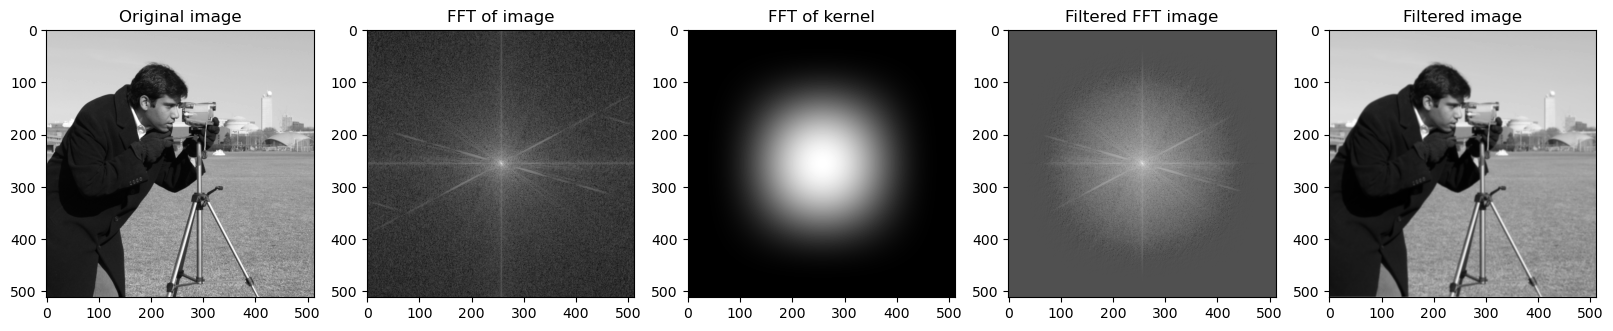

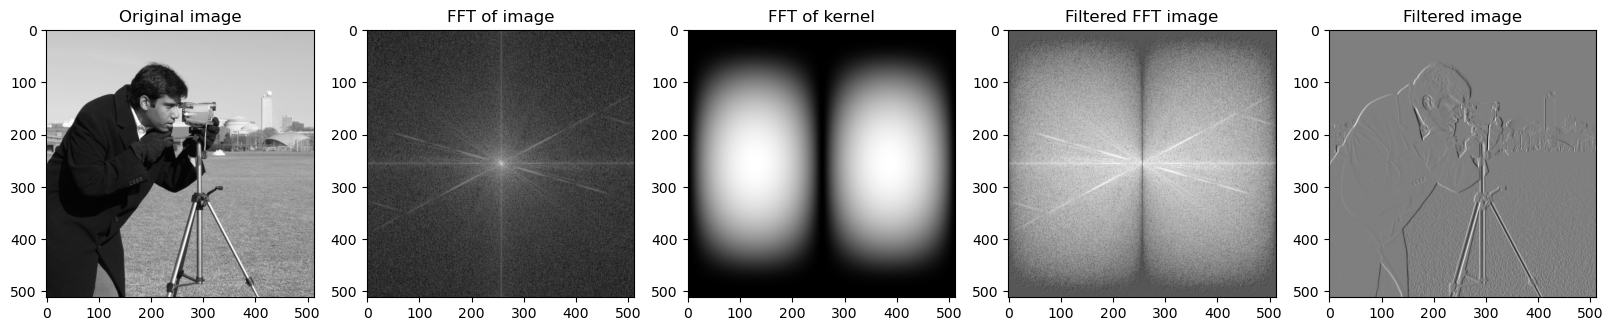

Saving image to: image_processed\camera_gaussian.png
Saving image to: image_processed\camera_sobelx.png


In [24]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)